Dataset: https://www.kaggle.com/datasets/mdtalhask/ai-powered-resume-screening-dataset-2025/data



## Data Cleansing

In [1]:
import pandas as pd


df = pd.read_csv(r"C:\Users\Mohadeseh Yousofy\OneDrive - NORDAKADEMIE\Nordakademie\ki\data\AI_Resume_Screening.csv")

print(df.head())


   Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   

   Experience (Years) Education                Certifications  \
0                  10      B.Sc                           NaN   
1                  10       MBA                     Google ML   
2                   1       MBA  Deep Learning Specialization   
3                   7    B.Tech                 AWS Certified   
4                   4       PhD                           NaN   

                Job Role Recruiter Decision  Salary Expectation ($)  \
0          AI Researcher               Hire              

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
print(df.describe(include='all'))

          Resume_ID         Name                    Skills  \
count   1000.000000         1000                      1000   
unique          NaN          989                       238   
top             NaN  Sarah Jones  Python, Machine Learning   
freq            NaN            3                        11   
mean     500.500000          NaN                       NaN   
std      288.819436          NaN                       NaN   
min        1.000000          NaN                       NaN   
25%      250.750000          NaN                       NaN   
50%      500.500000          NaN                       NaN   
75%      750.250000          NaN                       NaN   
max     1000.000000          NaN                       NaN   

        Experience (Years) Education                Certifications  \
count          1000.000000      1000                           726   
unique                 NaN         5                             3   
top                    NaN      B.Sc  Deep Le

In [4]:
print(df.isnull().sum())

Resume_ID                   0
Name                        0
Skills                      0
Experience (Years)          0
Education                   0
Certifications            274
Job Role                    0
Recruiter Decision          0
Salary Expectation ($)      0
Projects Count              0
AI Score (0-100)            0
dtype: int64


In [5]:

# Grundlegende Übersicht
print("Shape:", df.shape)
print("\nSpalten:")
print(df.columns.tolist())
print("\nErste 5 Zeilen:")
print(df.head())

print("\nInfo:")
print(df.info())

print("\nStatistik (numerische Spalten):")
print(df.describe(include='all'))


Shape: (1000, 11)

Spalten:
['Resume_ID', 'Name', 'Skills', 'Experience (Years)', 'Education', 'Certifications', 'Job Role', 'Recruiter Decision', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']

Erste 5 Zeilen:
   Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   

   Experience (Years) Education                Certifications  \
0                  10      B.Sc                           NaN   
1                  10       MBA                     Google ML   
2                   1       MBA  Deep Learning Specialization   
3                   7    B.Tech

In [6]:
df['Certifications'].fillna('None', inplace=True)


C:\Users\Mohadeseh Yousofy\AppData\Local\Temp\ipykernel_23356\2805288324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certifications'].fillna('None', inplace=True)


In [7]:
df['Skills_list'] = (df['Skills']
                     .str.split(',')
                     .apply(lambda lst: [s.strip().lower() for s in lst]))


In [8]:
df['Hire_binary'] = df['Recruiter Decision'].map({'Hire': 1, 'Reject': 0})


In [9]:
# Gegebenenfalls: Erste Vorschau auf geänderte Daten
print("Zertifikate unique:", df['Certifications'].unique()[:10])
print("Skills_list Beispiel:", df['Skills_list'].head().tolist())
print("Hire_binary value counts:", df['Hire_binary'].value_counts())

Zertifikate unique: ['None' 'Google ML' 'Deep Learning Specialization' 'AWS Certified']
Skills_list Beispiel: [['tensorflow', 'nlp', 'pytorch'], ['deep learning', 'machine learning', 'python', 'sql'], ['ethical hacking', 'cybersecurity', 'linux'], ['python', 'pytorch', 'tensorflow'], ['sql', 'react', 'java']]
Hire_binary value counts: Hire_binary
1    812
0    188
Name: count, dtype: int64


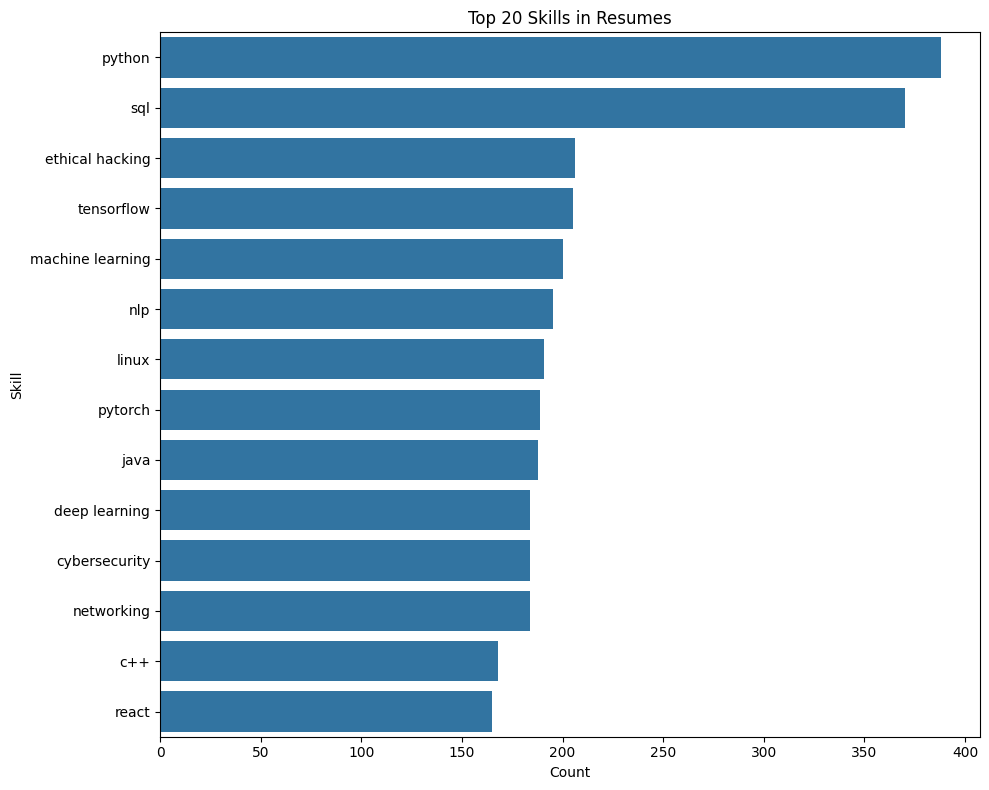

In [10]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_skills = [skill for lst in df['Skills_list'] for skill in lst]
skill_counts = Counter(all_skills)
top_skills = pd.DataFrame(skill_counts.most_common(20), columns=['Skill', 'Count'])

plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Skill', data=top_skills)
plt.title('Top 20 Skills in Resumes')
plt.tight_layout()
plt.show()

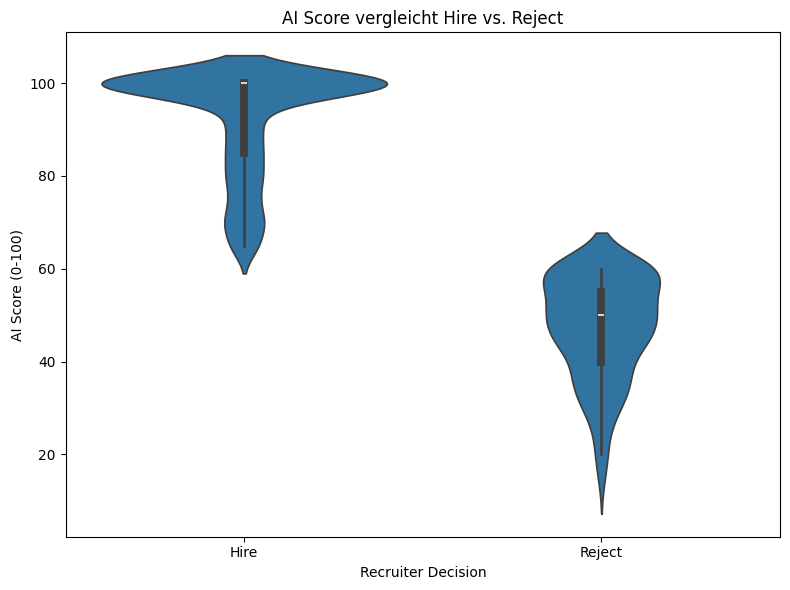

In [11]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Recruiter Decision', y='AI Score (0-100)', data=df)
plt.title('AI Score vergleicht Hire vs. Reject')
plt.tight_layout()
plt.show()


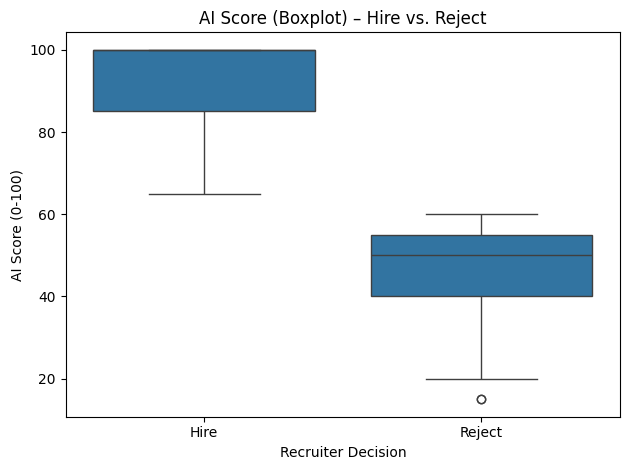

In [12]:
sns.boxplot(x='Recruiter Decision', y='AI Score (0-100)', data=df)
plt.title('AI Score (Boxplot) – Hire vs. Reject')
plt.tight_layout()
plt.show()


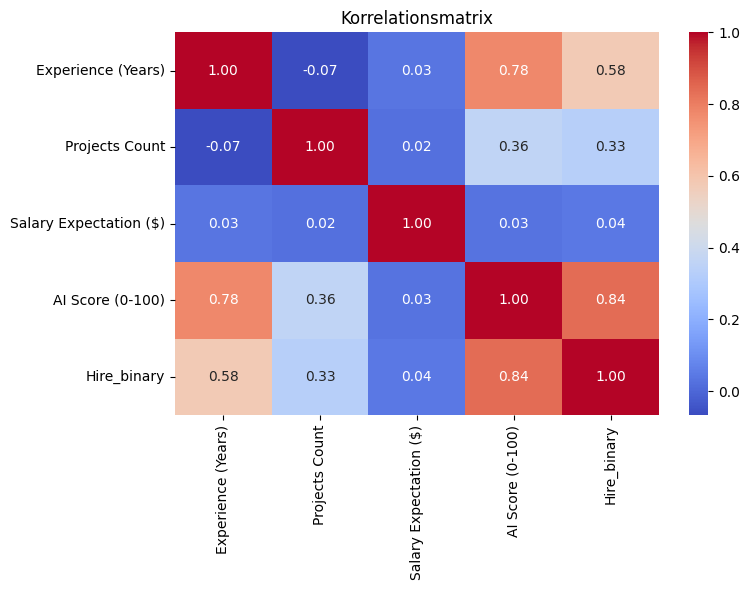

In [13]:
import numpy as np

corr = df[['Experience (Years)', 'Projects Count', 'Salary Expectation ($)', 'AI Score (0-100)', 'Hire_binary']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix')
plt.tight_layout()
plt.show()


In [14]:
import os, json, math, time, re
import pandas as pd
from openai import OpenAI

# OpenAI client
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
MODEL = "gpt-4o-mini"

def parse_json_safely(text: str):
    """Remove code fences and parse JSON content."""
    if not isinstance(text, str):
        return []
    # Remove ```json ... ``` fences if present
    fence = re.search(r"```(?:json)?\s*([\s\S]*?)```", text, flags=re.IGNORECASE)
    candidate = fence.group(1) if fence else text
    candidate = candidate.strip()
    try:
        return json.loads(candidate)
    except Exception as e:
        print("Still could not parse JSON:", e)
        return []

def classify_batch(names: list[str]) -> list[dict]:
    system_prompt = (
        "For each given full name, return a JSON array of objects "
        "with fields: name, gender (male/female/unknown), "
        "ethnicity (broad cultural/linguistic group; 'unknown' if unclear). "
        "Return ONLY JSON, no markdown fences, no prose."
    )
    user_prompt = json.dumps({"names": names}, ensure_ascii=False)

    resp = client.chat.completions.create(
        model=MODEL,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt},
        ],
        temperature=0,
    )
    content = resp.choices[0].message.content
    return parse_json_safely(content)

# --- Main loop over your dataframe ---
unique_names = df["Name"].astype(str).unique().tolist()
batch_size = 50
all_items = []

for i in range(0, len(unique_names), batch_size):
    batch = unique_names[i : i + batch_size]
    print(f"Processing batch {i//batch_size + 1}/{math.ceil(len(unique_names)/batch_size)}")
    items = classify_batch(batch)
    all_items.extend(items)
    time.sleep(1)  # brief pause to avoid hitting rate limits

# Map results back to df
map_gender = {it["name"]: it["gender"] for it in all_items if "name" in it}
map_ethnicity = {it["name"]: it["ethnicity"] for it in all_items if "name" in it}

df["gender"] = df["Name"].map(map_gender).fillna("unknown")
df["ethnicity"] = df["Name"].map(map_ethnicity).fillna("unknown")

# Save to CSV (new dataset)
df.to_csv("applicants_with_demographics.csv", index=False)
print("Saved to applicants_with_demographics.csv")


Processing batch 1/20
Processing batch 2/20
Processing batch 3/20
Processing batch 4/20
Processing batch 5/20
Processing batch 6/20
Processing batch 7/20
Processing batch 8/20
Processing batch 9/20
Processing batch 10/20
Processing batch 11/20
Processing batch 12/20
Processing batch 13/20
Processing batch 14/20
Processing batch 15/20
Processing batch 16/20
Processing batch 17/20
Processing batch 18/20
Processing batch 19/20
Processing batch 20/20
Saved to applicants_with_demographics.csv


In [16]:
import pandas as pd

df = pd.read_csv("applicants_with_demographics.csv")

print(df.shape)          # Zeilen, Spalten
print(df.dtypes)         # Datentypen
print(df.head())         # erste 5 Zeilen
print(df.describe())     # numerische Statistik


(1000, 15)
Resume_ID                  int64
Name                      object
Skills                    object
Experience (Years)         int64
Education                 object
Certifications            object
Job Role                  object
Recruiter Decision        object
Salary Expectation ($)     int64
Projects Count             int64
AI Score (0-100)           int64
Skills_list               object
Hire_binary                int64
gender                    object
ethnicity                 object
dtype: object
   Resume_ID              Name                                        Skills  \
0          1        Ashley Ali                      TensorFlow, NLP, Pytorch   
1          2      Wesley Roman  Deep Learning, Machine Learning, Python, SQL   
2          3     Corey Sanchez         Ethical Hacking, Cybersecurity, Linux   
3          4  Elizabeth Carney                   Python, Pytorch, TensorFlow   
4          5        Julie Hill                              SQL, React, Java   
